# MVC calculation

MVC calculation was done partly manually.

Steps: for each participant, get their emg pickle data from the first session. This is where they performed the isometric hold. Filter for this exercise, then use the same preprocessing steps for emg as later, then calculate the max value recorded from the emg envelope.

Results are ordered in a dictionary. This dictionary is used in another script, in the emg preprocessing, where values are normalized by the MVC.

In [115]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import pandas as pd
from scipy import signal
import pyemgpipeline.processors as processors
import pyemgpipeline as pep

Processing column: left


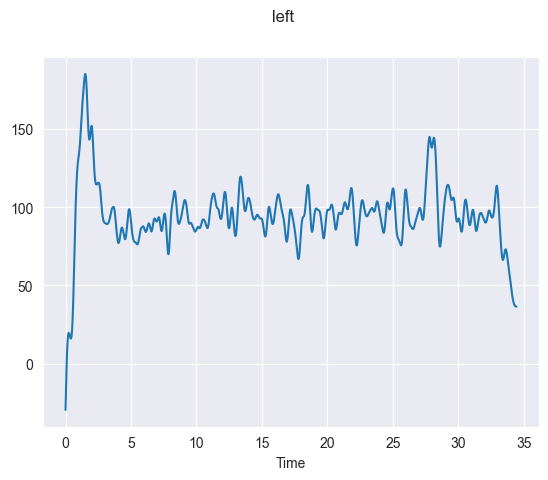

Left MVC: 185.26180048789817
Processing column: right


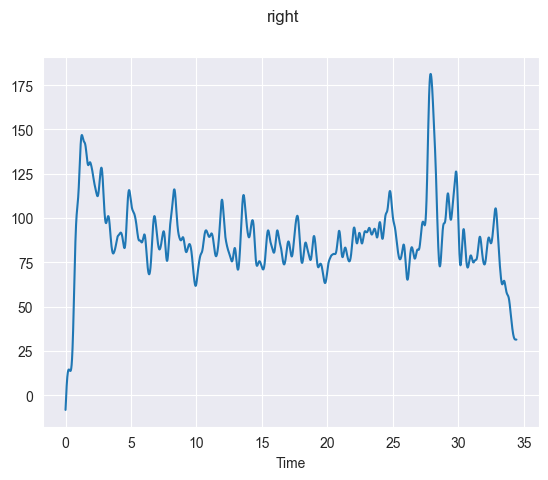

Right MVC: 181.32795408382566


In [128]:
import numpy as np

fs = 2000  # Sampling rate
w0 = 50 / (fs / 2)  # Notch filter at 50 Hz
Q = 30.0  # Quality factor for notch filter
  
person_name = "1"
emg_path = f"../data/raw/{person_name}/session1/session1_emg.pkl"

# Load IMU and EMG data
emg = pd.read_pickle(emg_path)
mvc_values =[]
emg = emg[emg["Marker"] == "hold"]

for col in ['left', 'right']:
    print(f"Processing column: {col}")
    data = emg[col].to_numpy()

    # Notch filter
    b, a = signal.iirnotch(w0, Q)
    notch_filtered = signal.lfilter(b, a, data)

    m = pep.wrappers.EMGMeasurement(notch_filtered, hz=2000, trial_name=col)
    m.apply_dc_offset_remover()
    m.apply_bandpass_filter(bf_order=4, bf_cutoff_fq_lo=25, bf_cutoff_fq_hi=350)
    m.apply_full_wave_rectifier()
    m.apply_linear_envelope(le_order=6, le_cutoff_fq=2)
    m.plot()
    d = m.data
    if col == 'left':
        mvc_left = np.max(d)
        print(f"Left MVC: {mvc_left}")
    else:
        mvc_right = np.max(d)
        print(f"Right MVC: {mvc_right}")

In [1]:
mvc_dict = {
    "Anita": {"mvc_left": 332.7315, "mvc_right": 255.2501},
    "Dávid": {"mvc_left": 316.8271, "mvc_right": 316.7368},
    "Flóra": {"mvc_left": 224.0826, "mvc_right": 175.1042},
    "István": {"mvc_left": 108.5914, "mvc_right": 158.3160},
    "Kitti": {"mvc_left": 278.4766, "mvc_right": 287.3040},
    "Kristóf": {"mvc_left": 294.5414, "mvc_right": 214.8884},
    "Margita": {"mvc_left": 222.7770, "mvc_right": 247.6796},
    "Patrik": {"mvc_left": 488.4035, "mvc_right": 311.5888},
    "Petra": {"mvc_left": 411.9400, "mvc_right": 344.3418},
    "Zoltán": {"mvc_left": 185.2618, "mvc_right": 181.3279}
}